# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [5]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = os.path.join("..","CSV folder","city_data.csv")
ride_data_to_load = os.path.join("..","CSV folder","ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [6]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [7]:
#  1. Get the total rides for each city type
rider_city = pyber_data_df.groupby(["type"])["ride_id"].count()
rider_city

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [8]:
# 2. Get the total drivers for each city type
driver_city = pyber_data_df.groupby(["type"])["driver_count"].sum()
driver_city

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [9]:
#  3. Get the total amount of fares for each city type
fares_city = pyber_data_df.groupby(["type"])["fare"].sum()
fares_city

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [10]:
#  4. Get the average fare per ride for each city type. 
fares_city_mean = pyber_data_df.groupby(["type"])["fare"].mean()
fares_city_mean

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [11]:
# 5. Get the average fare per driver for each city type. 
driver_fares_city_mean = fares_city/driver_city
driver_fares_city_mean.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64>

In [12]:
#  6. Create a PyBer summary DataFrame. 
summary_df = pd.DataFrame()
summary_df["Total Riders"] = rider_city
summary_df["Total Drivers"] = driver_city
summary_df["Total Fares"] = fares_city
summary_df["Average Fares"] = fares_city_mean
summary_df["Average Fares/Driver"] = driver_fares_city_mean
summary_df

,Total Riders,Total Drivers,Total Fares,Average Fares,Average Fares/Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [13]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.dtypes

Total Riders              int64
Total Drivers             int64
Total Fares             float64
Average Fares           float64
Average Fares/Driver    float64
dtype: object

In [14]:
#  8. Format the columns.
summary_df["Total Riders"] = summary_df["Total Riders"].map("{:}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:}".format)
summary_df["Average Fares"] = summary_df["Average Fares"].map("${:}".format)
summary_df["Average Fares/Driver"] = summary_df["Average Fares/Driver"].map("${:}".format)
summary_df.head()

,Total Riders,Total Drivers,Total Fares,Average Fares,Average Fares/Driver
type,,,,,
Rural,125,537,$4327.93,$34.62344,$8.059459962756053
Suburban,625,8570,$19356.33,$30.970128000000003,$2.2586149358226373
Urban,1625,59602,$39854.38,$24.525772307692307,$0.6686752122412


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [15]:
# 1. Read the merged DataFrame
summary_df.head()

,Total Riders,Total Drivers,Total Fares,Average Fares,Average Fares/Driver
type,,,,,
Rural,125,537,$4327.93,$34.62344,$8.059459962756053
Suburban,625,8570,$19356.33,$30.970128000000003,$2.2586149358226373
Urban,1625,59602,$39854.38,$24.525772307692307,$0.6686752122412


In [25]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_city = pyber_data_df.groupby(["type","date"])["fare"].sum()
date_fare_df = pd.DataFrame()
date_fare_df["fare"]= date_city
date_fare_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [26]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
date_fare_df.reset_index(inplace = True)
date_fare_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [37]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
date_pivot = date_fare_df.pivot(index = 'date', columns = 'type',values = 'fare')
date_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [48]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_pivot_range = date_pivot.loc['2019-01-01':'2019-04-29',]
date_pivot_range


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [54]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
date_pivot_range.index = pd.to_datetime(date_pivot_range.index)
date_pivot_range

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [55]:
# 7. Check that the datatype for the index is datetime using df.info()
date_pivot_range.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [56]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = date_pivot_range.resample("W").sum()
weekly_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


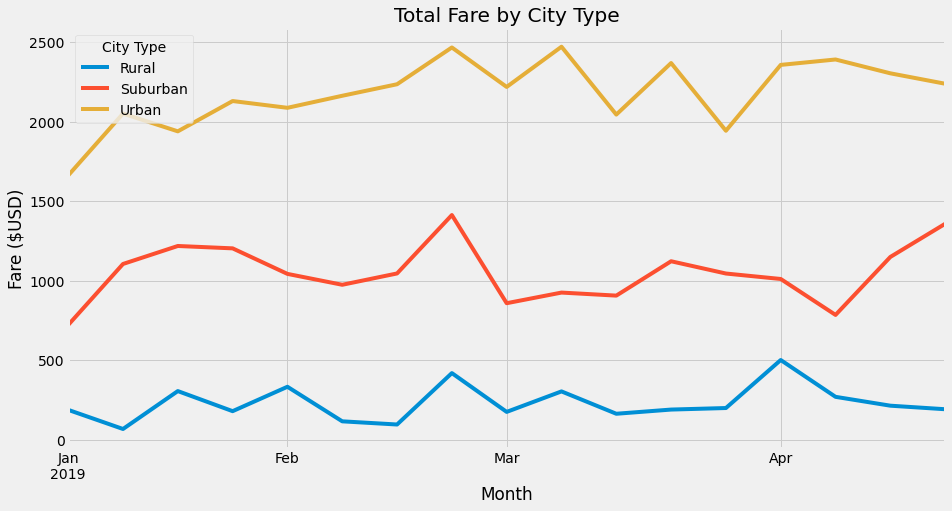

<Figure size 432x288 with 0 Axes>

In [69]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')
weekly_fares_df.plot(figsize=(14,8))
plt.gcf().subplots_adjust(bottom=0.15)

plt.title("Total Fare by City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("Month")

plt.legend(title='City Type')
plt.show()

plt.savefig("..\PyBer_fare_summary.png")

